#Importation des packages

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import os

#Paludisme

Le paludisme est une maladie parasitaire potentiellement mortelle causée par une infection par un protozoaire Plasmodium transmis par un moustique anophèle femelle infectieux.

Le modèle suivant tente de distinguer les cellules infectées par le paludisme de celles qui ne le sont pas.

Répartition de ce exo :

* Chargement de l'ensemble de données : chargez les données et importez les bibliothèques.

* Prétraitement des données :
Lire les images, étiquettes stockées dans 2 dossiers (Parasitisés, Non infectés).

* Afficher les images non infectées et parasitées avec leurs étiquettes respectives.
* Normalisation des données d'image.
* Division des données en test, entrainnement et validation
d'ImageDataGenerator
* Création et formation du modèle
: créez un modèle cnn avec la bibliothèque  KERAS.

* Évaluation : affichez  les métriques d’évaluation et tracer la courbe de validation.



Chargement des données

In [24]:
import os
import pandas as pd
import numpy as np
import cv2
import random

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

examinez quelques exemples de cellules parasitées et non infectées.

In [25]:
root = "../cell_images/"

In [26]:
Parasitized = os.listdir(root+ 'Parasitized') #root +para
Uninfected = os.listdir(root + 'Uninfected') #root+uninf

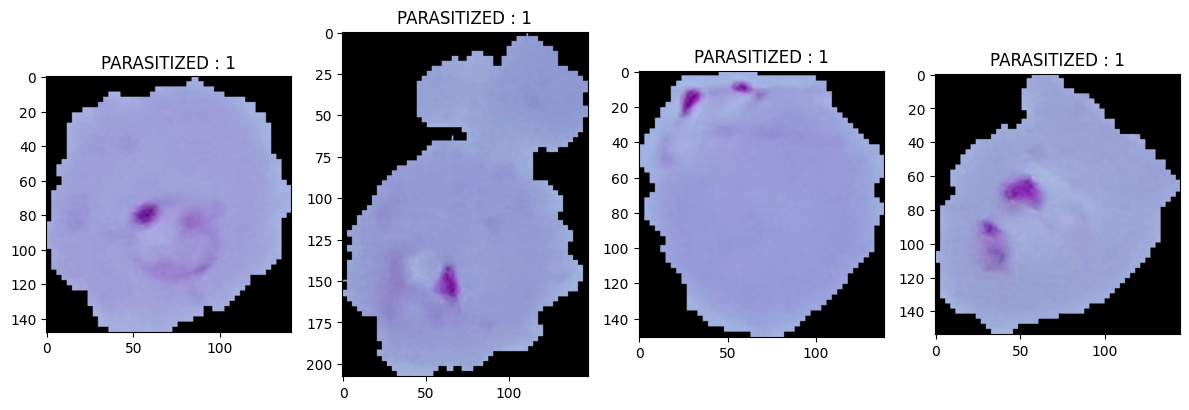

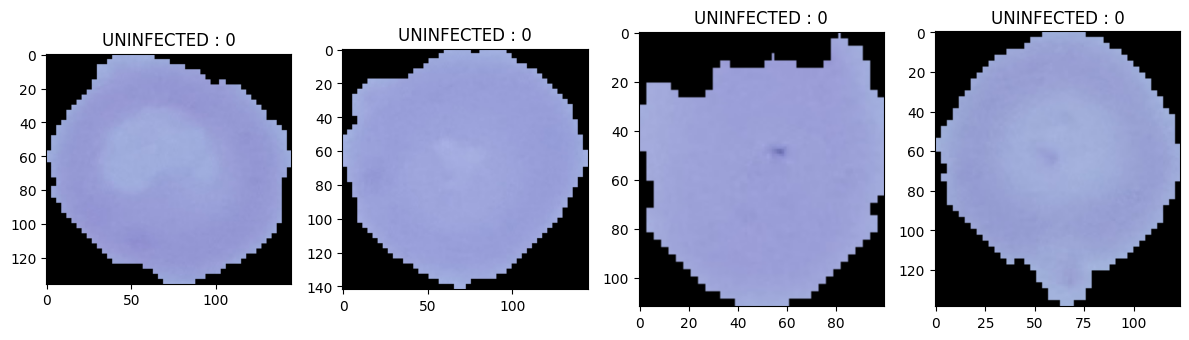

In [27]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(root +"Parasitized"+"/"+Parasitized[i]) # root+para+ Parasitized[i]
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(root +"Uninfected"+"/"+Uninfected[i+1]) #root+uninf+ Uninfected[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

Les images sont redimensionnées et converties en tableaux avant d'être ajoutées dans une seule liste

In [28]:
data = []
labels = []

for img in Parasitized:
    try:
        img_read = plt.imread(root +"Parasitized"+"/"+ img) #root+para+ img
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in Uninfected:
    try:
        img_read = plt.imread(root +"Uninfected"+"/" +img)        #root+uninf+ img
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None


#Visualiser des données

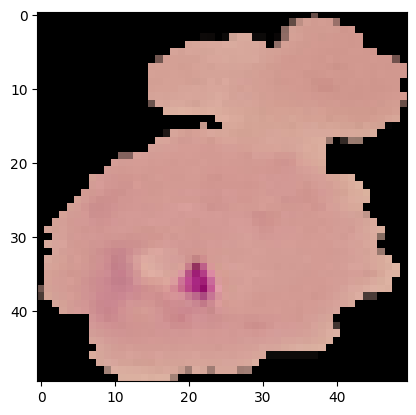

In [29]:
plt.imshow(data[0], cmap='gray')
plt.show()

#Répartition de l'ensemble de données



Les données traitées et mélangées sont désormais divisées en ensembles de formation, de validation et de test.

Une répartition de 80 %-10 %-10 % est suivie


In [30]:
X = np.array(data)
y = np.array(labels)

In [31]:
print(X.shape)
print(y.shape)

(27557, 50, 50, 3)
(27557,)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size=0.5, stratify=Y_test)
# Y_test = np.argmax(Y_test, axis=1)

#Modèle CNN

Question 1 : Proposez une differentes approche modèle CNN  pour résoudre ce problème.

NB: l'objectif est de Proposer differentes approche pour classifier les cellule infecter et non infecter

NB: Le modèle utilise l'optimiseur Adam, la précision étant la métrique


In [13]:
image_shape = data[0].shape
print(image_shape)

(50, 50, 3)


In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [37]:
model_1 = Sequential()

# Ajout des couches convolutionnelles et de pooling
model_1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())

# Couches entièrement connectées
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))

# Couche de sortie
model_1.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Initialisation du callback EarlyStopping
early = EarlyStopping(monitor='val_loss', patience=2)


In [34]:
# Création du modèle 2
model_2 = Sequential()

# Ajout des couches convolutionnelles avec Batch Normalization
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

# Couches entièrement connectées
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))

# Couche de sortie
model_2.add(Dense(1, activation='sigmoid'))

# Définition d'un taux d'apprentissage plus faible
learning_rate = 0.0001  # Taux d'apprentissage réduit

# Utilisation de l'optimiseur Adam avec un taux d'apprentissage personnalisé
optimizer = Adam(learning_rate=learning_rate)

# Compilation du modèle avec le nouvel optimiseur
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Initialisation des callbacks
early = EarlyStopping(monitor='val_loss', patience=3)  # Arrêt précoce si la perte de validation ne s'améliore pas
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)  # Réduction du taux d'apprentissage

Question 2: calculer le nombre de parametre pour chaque modele proposez

In [38]:
# Paramètres du modèle 1
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 4, 4, 64)         

In [36]:
# Paramètres du modèle 2
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_20 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_21 (Ba  (None, 22, 22, 64)        256       
 tchNormalization)                                               
                                                      

Question 3: Utiliser les données pour entrainner les differents modele proposer

NB : Le modèle est entraîné pendant 10 époques avec une taille de lot de 64 en utilisant la précision comme métrique

In [39]:
# Nombre d'epochs
epoch = 10
# Définition de la taille de batch
batch_size = 64

In [40]:
# Entraînement du modèle 1
result_1 = model_1.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size,
                   validation_data=(X_val, Y_val), callbacks=[early], verbose=1)

Epoch 1/10
345/345 [==============================] - 286s 748ms/step - loss: 0.4656 - accuracy: 0.7641 - val_loss: 0.2740 - val_accuracy: 0.8850
Epoch 2/10
345/345 [==============================] - 291s 844ms/step - loss: 0.1886 - accuracy: 0.9358 - val_loss: 0.1604 - val_accuracy: 0.9499
Epoch 3/10
345/345 [==============================] - 273s 791ms/step - loss: 0.1583 - accuracy: 0.9496 - val_loss: 0.1436 - val_accuracy: 0.9543
Epoch 4/10
345/345 [==============================] - 288s 835ms/step - loss: 0.1469 - accuracy: 0.9531 - val_loss: 0.1327 - val_accuracy: 0.9572
Epoch 5/10
345/345 [==============================] - 286s 829ms/step - loss: 0.1381 - accuracy: 0.9550 - val_loss: 0.1443 - val_accuracy: 0.9499
Epoch 6/10
345/345 [==============================] - 277s 803ms/step - loss: 0.1299 - accuracy: 0.9579 - val_loss: 0.1266 - val_accuracy: 0.9568
Epoch 7/10
345/345 [==============================] - 271s 785ms/step - loss: 0.1212 - accuracy: 0.9601 - val_loss: 0.1256 -

In [41]:
# Entraînement du modèle 2
result_2 = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, 
                       validation_data=(X_val, Y_val), callbacks=[early, reduce_lr])

Epoch 1/10
345/345 [==============================] - 432s 1s/step - loss: 0.6100 - accuracy: 0.7203 - val_loss: 1.8940 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/10
345/345 [==============================] - 373s 1s/step - loss: 0.3476 - accuracy: 0.8484 - val_loss: 0.6977 - val_accuracy: 0.7351 - lr: 1.0000e-04
Epoch 3/10
345/345 [==============================] - 377s 1s/step - loss: 0.2446 - accuracy: 0.9017 - val_loss: 0.2272 - val_accuracy: 0.9122 - lr: 1.0000e-04
Epoch 4/10
345/345 [==============================] - 377s 1s/step - loss: 0.1907 - accuracy: 0.9253 - val_loss: 0.1859 - val_accuracy: 0.9274 - lr: 1.0000e-04
Epoch 5/10
345/345 [==============================] - 2320s 7s/step - loss: 0.1627 - accuracy: 0.9408 - val_loss: 0.1739 - val_accuracy: 0.9351 - lr: 1.0000e-04
Epoch 6/10
345/345 [==============================] - 366s 1s/step - loss: 0.1473 - accuracy: 0.9472 - val_loss: 0.1510 - val_accuracy: 0.9467 - lr: 1.0000e-04
Epoch 7/10
345/345 [===================

Question 4:  utilisé le modele optimale pour prédire   l'ensemble de test.

In [43]:
# Faire des prédictions sur l'ensemble de test
Y_pred = model_2.predict(X_test)


87/87 [==============================] - 16s 175ms/step


In [44]:
# Afficher les prédictions
print(Y_pred)

[[0.43302536]
 [0.9999752 ]
 [0.08736772]
 ...
 [0.99996996]
 [0.99532056]
 [0.7065983 ]]


In [45]:
# Convertir les probabilités en classes (0 ou 1) 
Y_pred_classes = (Y_pred > 0.5).astype(int)


In [46]:
# Afficher les classes prédites
print(Y_pred_classes)

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


Question 5 :  Determiner les métriques d’évaluation et tracer la courbe de validation.

In [47]:
# Extraire l'historique des métriques
history_2 = result_2.history

# Afficher les métriques d'entraînement
print("Métriques d'entraînement :")
print(f"Perte d'entraînement : {history_2['loss'][-1]}")
print(f"Précision d'entraînement : {history_2['accuracy'][-1]}")

# Afficher les métriques de validation
print("\nMétriques de validation :")
print(f"Perte de validation : {history_2['val_loss'][-1]}")
print(f"Précision de validation : {history_2['val_accuracy'][-1]}")


Métriques d'entraînement :
Perte d'entraînement : 0.1198921650648117
Précision d'entraînement : 0.9584486484527588

Métriques de validation :
Perte de validation : 0.1704651117324829
Précision de validation : 0.9375907182693481


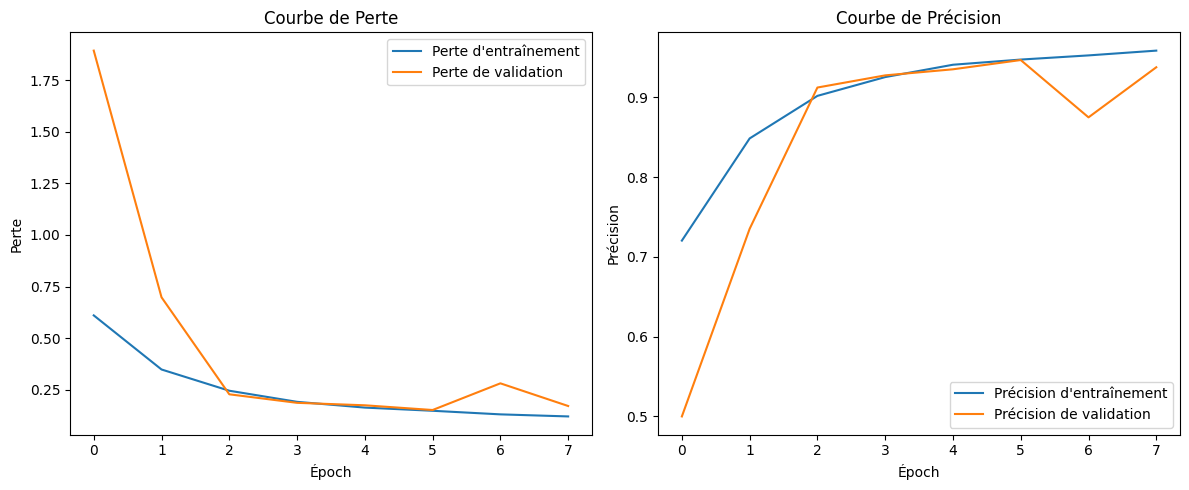

In [48]:
# Tracer les courbes de perte
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_2['loss'], label='Perte d\'entraînement')
plt.plot(history_2['val_loss'], label='Perte de validation')
plt.xlabel('Époch')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte')

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_2['accuracy'], label='Précision d\'entraînement')
plt.plot(history_2['val_accuracy'], label='Précision de validation')
plt.xlabel('Époch')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de Précision')

plt.tight_layout()
plt.show()


#Exercice 2

#Definition des constants

In [51]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
# cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#ls

#Prepation des données

In [52]:
# filenames = os.listdir("/content/drive/MyDrive/cats_dogs/")
filenames = os.listdir("./cats_dogs/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
    })

In [ ]:
df.head()

,filename,category
0,dog.1.jpg,1
1,cat.6.jpg,0
2,cat.5.jpg,0
3,cat.7.jpg,0
4,cat.8.jpg,0


#Voir la totalité des données

<Axes: xlabel='category'>

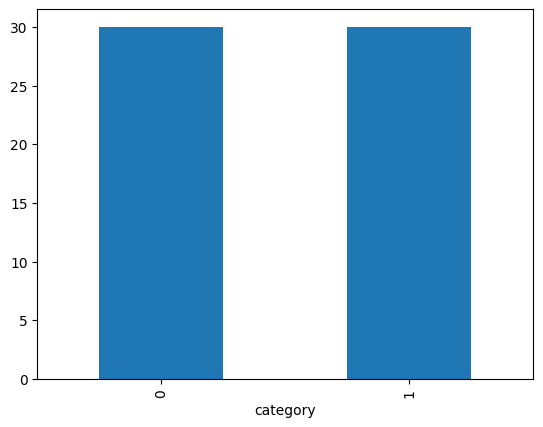

In [54]:
df['category'].value_counts().plot.bar()

#Voir l'exemple d'image

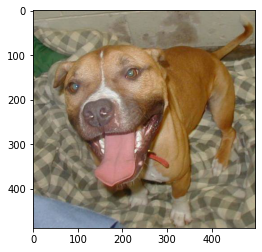

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/cats_dogs/" + sample)
plt.imshow(image)

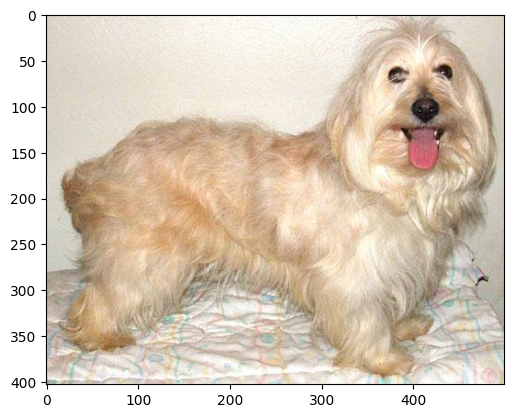

In [55]:
sample = random.choice(filenames)
image = load_img("./cats_dogs/" + sample)
plt.imshow(image)

# création du modèle

Nous définissons l'architecture du CNN comme suit:
Soit une image de dimension IMAGE_SIZE
Une premiere couche composer de 32 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 70 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 128 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une couche de  sortie avec  fonction d'actvation softmax.


In [60]:
# Implémenter votre code
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Questions

Question 1 : Quelle est le type de cette classification?\
Question 2 : Implémenter le réseau convolutif\
Question 3 : Calculer le nombres de paramètres\
Question 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif\


## Reponse 1- Le type de classification
c'est une classification multi-classes.

## Reeponse 2 : Implémentation du réseau convolutif

In [62]:
#2- Implémentation du code 

# Définir les dimensions de l'image d'entrée
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

# Créer le modèle CNN
model = Sequential()

# Première couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Deuxième couche de convolution
model.add(Conv2D(70, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Troisième couche de convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Quatrième couche de convolution
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Cinquième couche de convolution
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten pour passer aux couches denses
model.add(Flatten())

# Couche de sortie
model_2.add(Dense(1, activation='sigmoid'))

## Reponse 3 : Calculer le nombres de paramètres

In [63]:
#3- Summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 70)        20230     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 30, 30, 70)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 30, 30, 70)      

## Reponse 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif
La méthode Dropout est  utilisée pour réduire le surapprentissage (ou sur-ajustement) dans un réseau de neurones. de plus,
Prévient le surapprentissage (Overfitting) en désactivant des neurones aléatoires et améliore la capacité du modèle à généraliser à de nouvelles données

#Exercice 3

Les réseaux de neurones convolutionnels classiques sont généralement composés d’une succession de couches de convolutions (avec ReLU) avec de plus en plus de filtres,  et dont la dimension spatiale est progressivement réduite par des couches de max pooling possiblement jusqu’à aggregation totale des dimensions spatiales,\
 il ne reste donc plus que la "profondeur" correspondant au nombre de filtres appliqués par la dernière convolution (1 × 1 × C).
 On y ajoute enfin généralement une ou quelques couches linéaires (appelées fully-connected).

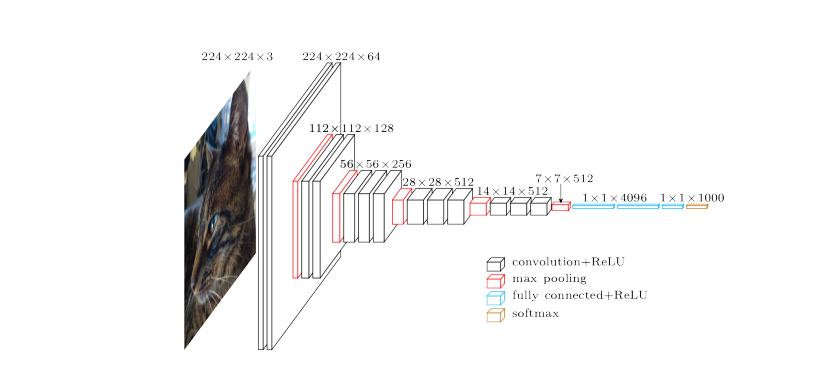

Considérant un seul filtre de convolution de padding p, de stride s et de taille de kernel k, pour une
entrée de taille x × y × z quelle sera la taille de sortie ?\
Combien y a-t-il de parametres à apprendre ?\
Combien de parametres aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de
la même taille ?

1- Déterminons la taille de sortie

- largeur_sortie = (x - k + 2 * p) // s + 1

- longuer_sortie= (h - k + 2 * p) // s + 1

2- Nombre de paramètres
- num_params = (k * k * 3 + 1)*num_filters  

3- Nombre de paramètres aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de
la même taille

nombre_parametre = (Nombre_entre*Nombre_neurones_sortie)+Nombre_neurones_sortie


Quel interêt voyez-vous à l’usage du max pooling ?

- Il réduit la taille des caractéristiques, diminue le nombre de paramètres, et améliore la robustesse aux variations de position

Implementer ce réseau convolutif

In [64]:
# Définir les dimensions de l'image d'entrée
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

# Créer le modèle
model = Sequential()

# Première couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Deuxième couche de convolution
model.add(Conv2D(70, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Troisième couche de convolution
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Quatrième couche de convolution
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Cinquième couche de convolution
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Aplatir les données
model.add(Flatten())

# Couche fully-connected
model.add(Dense(10, activation='softmax'))  # Exemple avec 10 neurones de sortie

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [65]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 64, 64, 70)        20230     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 32, 32, 70)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 32, 32, 70)      

#Exercice 4

Nous allons désormais implémenter notre premier réseau convolutionnel que nous allons appliquer à la
base de données CIFAR-10 (Krizhevsky, 2009, c.f. Figure 3). Cette base d’images RGB de 32×32 pixels
comporte 10 classes, 50k images en train et 10k images en test.


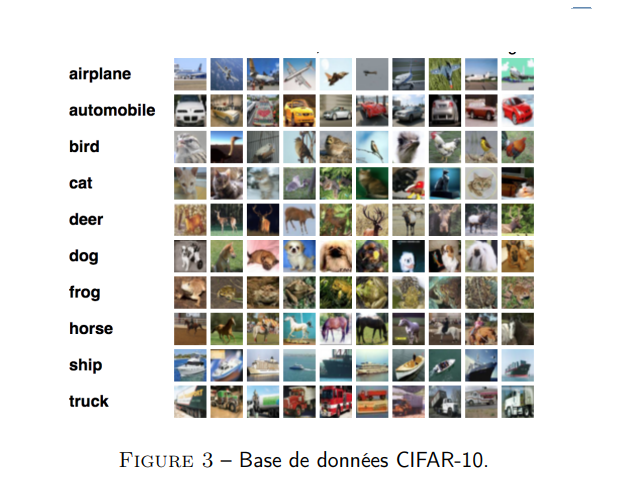

Le réseau que nous allons implémenter a un style proche de l’architecture AlexNet de Krizhevsky et al.\
(2012) adaptée à la base CIFAR-10 dont les images sont plus petites. Il sera composé des couches suivantes :\
— conv1 : 32 convolutions 5×5, suivie de ReLU \
— pool1 : max-pooling 2×2 \
— conv2 : 64 convolutions 5×5, suivie de ReLU \
— pool2 : max-pooling 2×2 \
— conv3 : 64 convolutions 5×5, suivie de ReLU \
— pool3 : max-pooling 2×2 \
— fc4 : fully-connected, 1000 neurones en sortie, suivie de ReLU \
— fc5 : fully-connected, 10 neurones en sortie, suivie de softmax

#Question

Implementer ce réseau convolutif

In [3]:
# Définir l'entrée 
# Images RGB de 32x32 pixels
input_shape = (32, 32, 3)  

# Créer le modèle CNN
model = Sequential()

# Première couche de convolution
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Deuxième couche de convolution
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Troisième couche de convolution
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Aplatir pour passer aux couches fully connected
model.add(Flatten())

# Couche fully connected avec 1000 neurones
model.add(Dense(1000, activation='relu'))

# Couche de sortie avec 10 neurones (une par classe CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Affichage du résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

Pour les convolutions, on veut conserver en sortie les mêmes dimensions spatiales qu’en entrée.\
Quelles valeurs de padding et de stride va-t-on choisir ?\
Pour les max poolings, on veut réduire les dimensions spatiales d’un facteur 2.\
 Quelles valeurs de padding et de stride va-t-on choisir ?\
Pour chaque couche, indiquer la taille de sortie et le nombre de poids à apprendre. \
Commentez cette répartition.\
Quel est donc le nombre total de poids à apprendre\
Comparer cela au nombre d’exemples

#### Quelles valeurs de padding et de stride va-t-on choisir ?\
- Padding = 2 (pour une taille de filtre 5x5)
- Stride = 1

#### Pour les max poolings, on veut réduire les dimensions spatiales d’un facteur 2.
Pour réduire les dimensions spatiales d'un facteur 2, nous utilisons
- Kernel size = 2x2 
- Stride = 2 
- Padding = 0 

#### Taille de sortie de chaque couche

Voici les dimensions de sortie après chaque couche du réseau :

Entrée : 32x32x3 (RGB)

conv1 : 32 filtres de 5x5, sortie de 32x32x32

Nombre de poids : 32×(5×5×3+1)=32×76=2432 

NB: (le "+1" correspond au biais) 

pool1 : max-pooling 2x2, sortie de 16x16x32 

conv2 : 64 filtres de 5x5, sortie de 16x16x64

Nombre de poids : 64×(5×5×32+1)=64×801=51264 

pool2 : max-pooling 2x2, sortie de 8x8x64 

conv3 : 64 filtres de 5x5, sortie de 8x8x64 

Nombre de poids : 64×(5×5×64+1)=64×1601=102464 

pool3 : max-pooling 2x2, sortie de 4x4x64 

fc4 : fully-connected avec 1000 neurones, sortie de 1000 

Nombre de poids : (4×4×64+1)×1000=1025×1000=1025000 

fc5 : fully-connected avec 10 neurones (sortie finale), sortie de 10 

Nombre de poids : (1000+1)×10=10010 

#### Nombre total de poids à apprendre 

Le nombre total de poids à apprendre est la somme des poids de chaque couche : 2432+51264+102464+1025000+10010=1182170 

#### Comparaison avec le nombre d'exemples 

La base de données CIFAR-10 contient 50 000 images d'entraînement. Comparons cela au nombre de poids à apprendre :

Nombre total de poids à apprendre : 1 182 170

Nombre d'exemples d'entraînement : 50 000